In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RANSACRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the Data and Take a quieck Look :

In [2]:
df = pd.read_csv('diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(50000, 10)

In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Exploratory Data Analysis :

### Display the Distribution of each num column

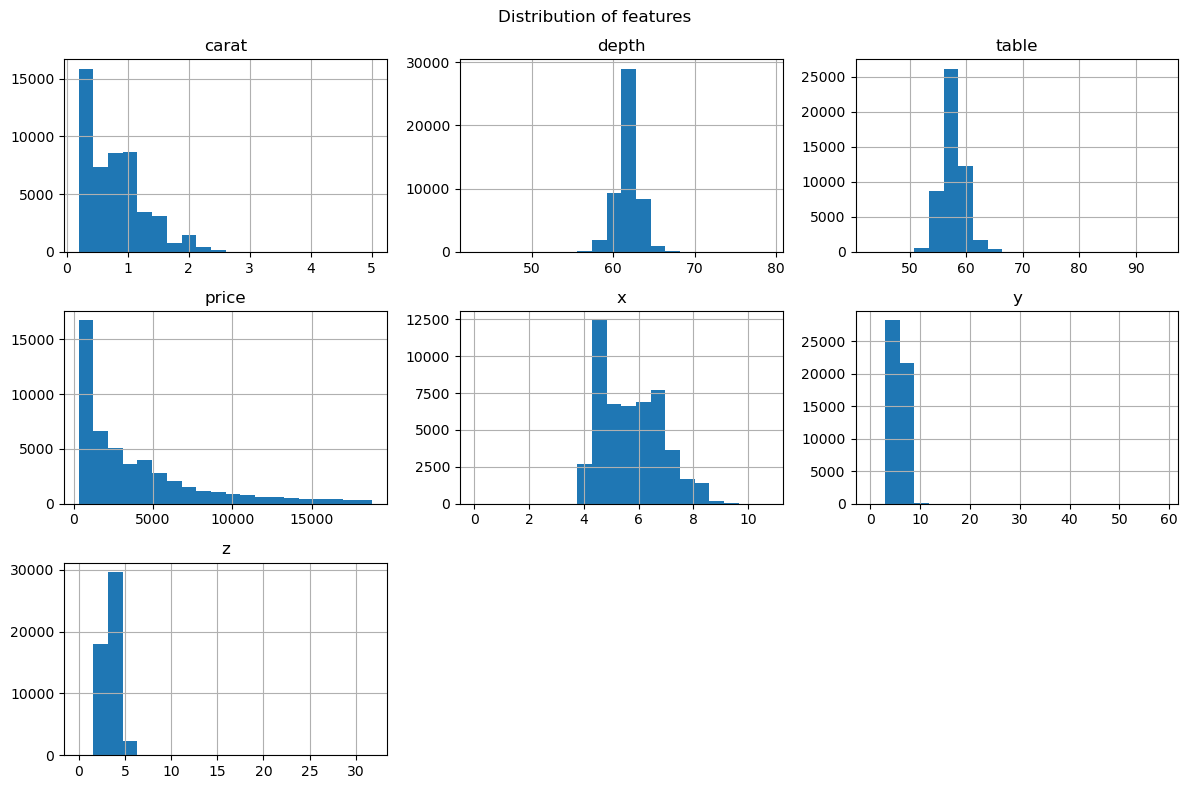

In [6]:
df.hist(bins = 20, figsize = (12, 8))
plt.suptitle('Distribution of features')
plt.tight_layout()
plt.show();

### Check for Outliers

<Axes: >

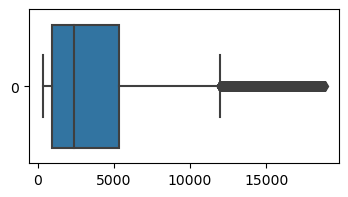

In [7]:
plt.figure(figsize = (4, 2))
sns.boxplot(data = df['price'], orient = 'h')

<Axes: >

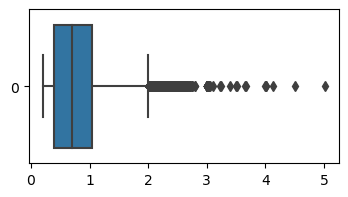

In [8]:
plt.figure(figsize = (4, 2))
sns.boxplot(data = df['carat'], orient = 'h')

<Axes: >

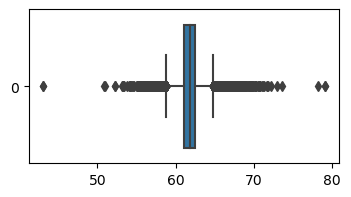

In [9]:
plt.figure(figsize = (4, 2))
sns.boxplot(data = df['depth'], orient = 'h')

<Axes: >

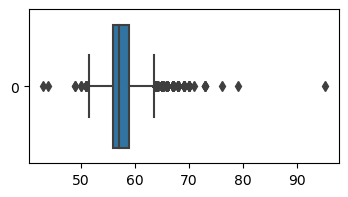

In [10]:
plt.figure(figsize = (4, 2))
sns.boxplot(data = df['table'], orient = 'h')

<Axes: >

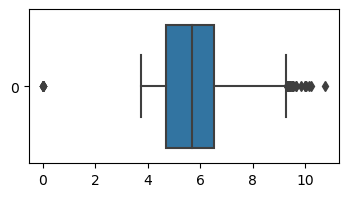

In [11]:
plt.figure(figsize = (4, 2))
sns.boxplot(data = df['x'], orient = 'h')

<Axes: >

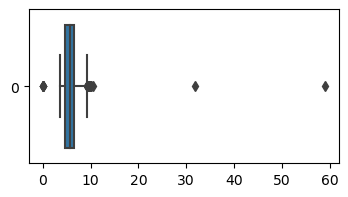

In [12]:
plt.figure(figsize = (4, 2))
sns.boxplot(data = df['y'], orient = 'h')

<Axes: >

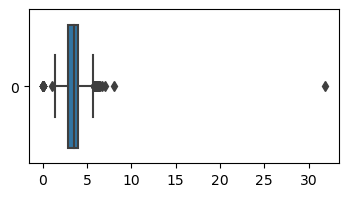

In [13]:
plt.figure(figsize = (4, 2))
sns.boxplot(data = df['z'], orient = 'h')

### Check the Relationship between Fetures

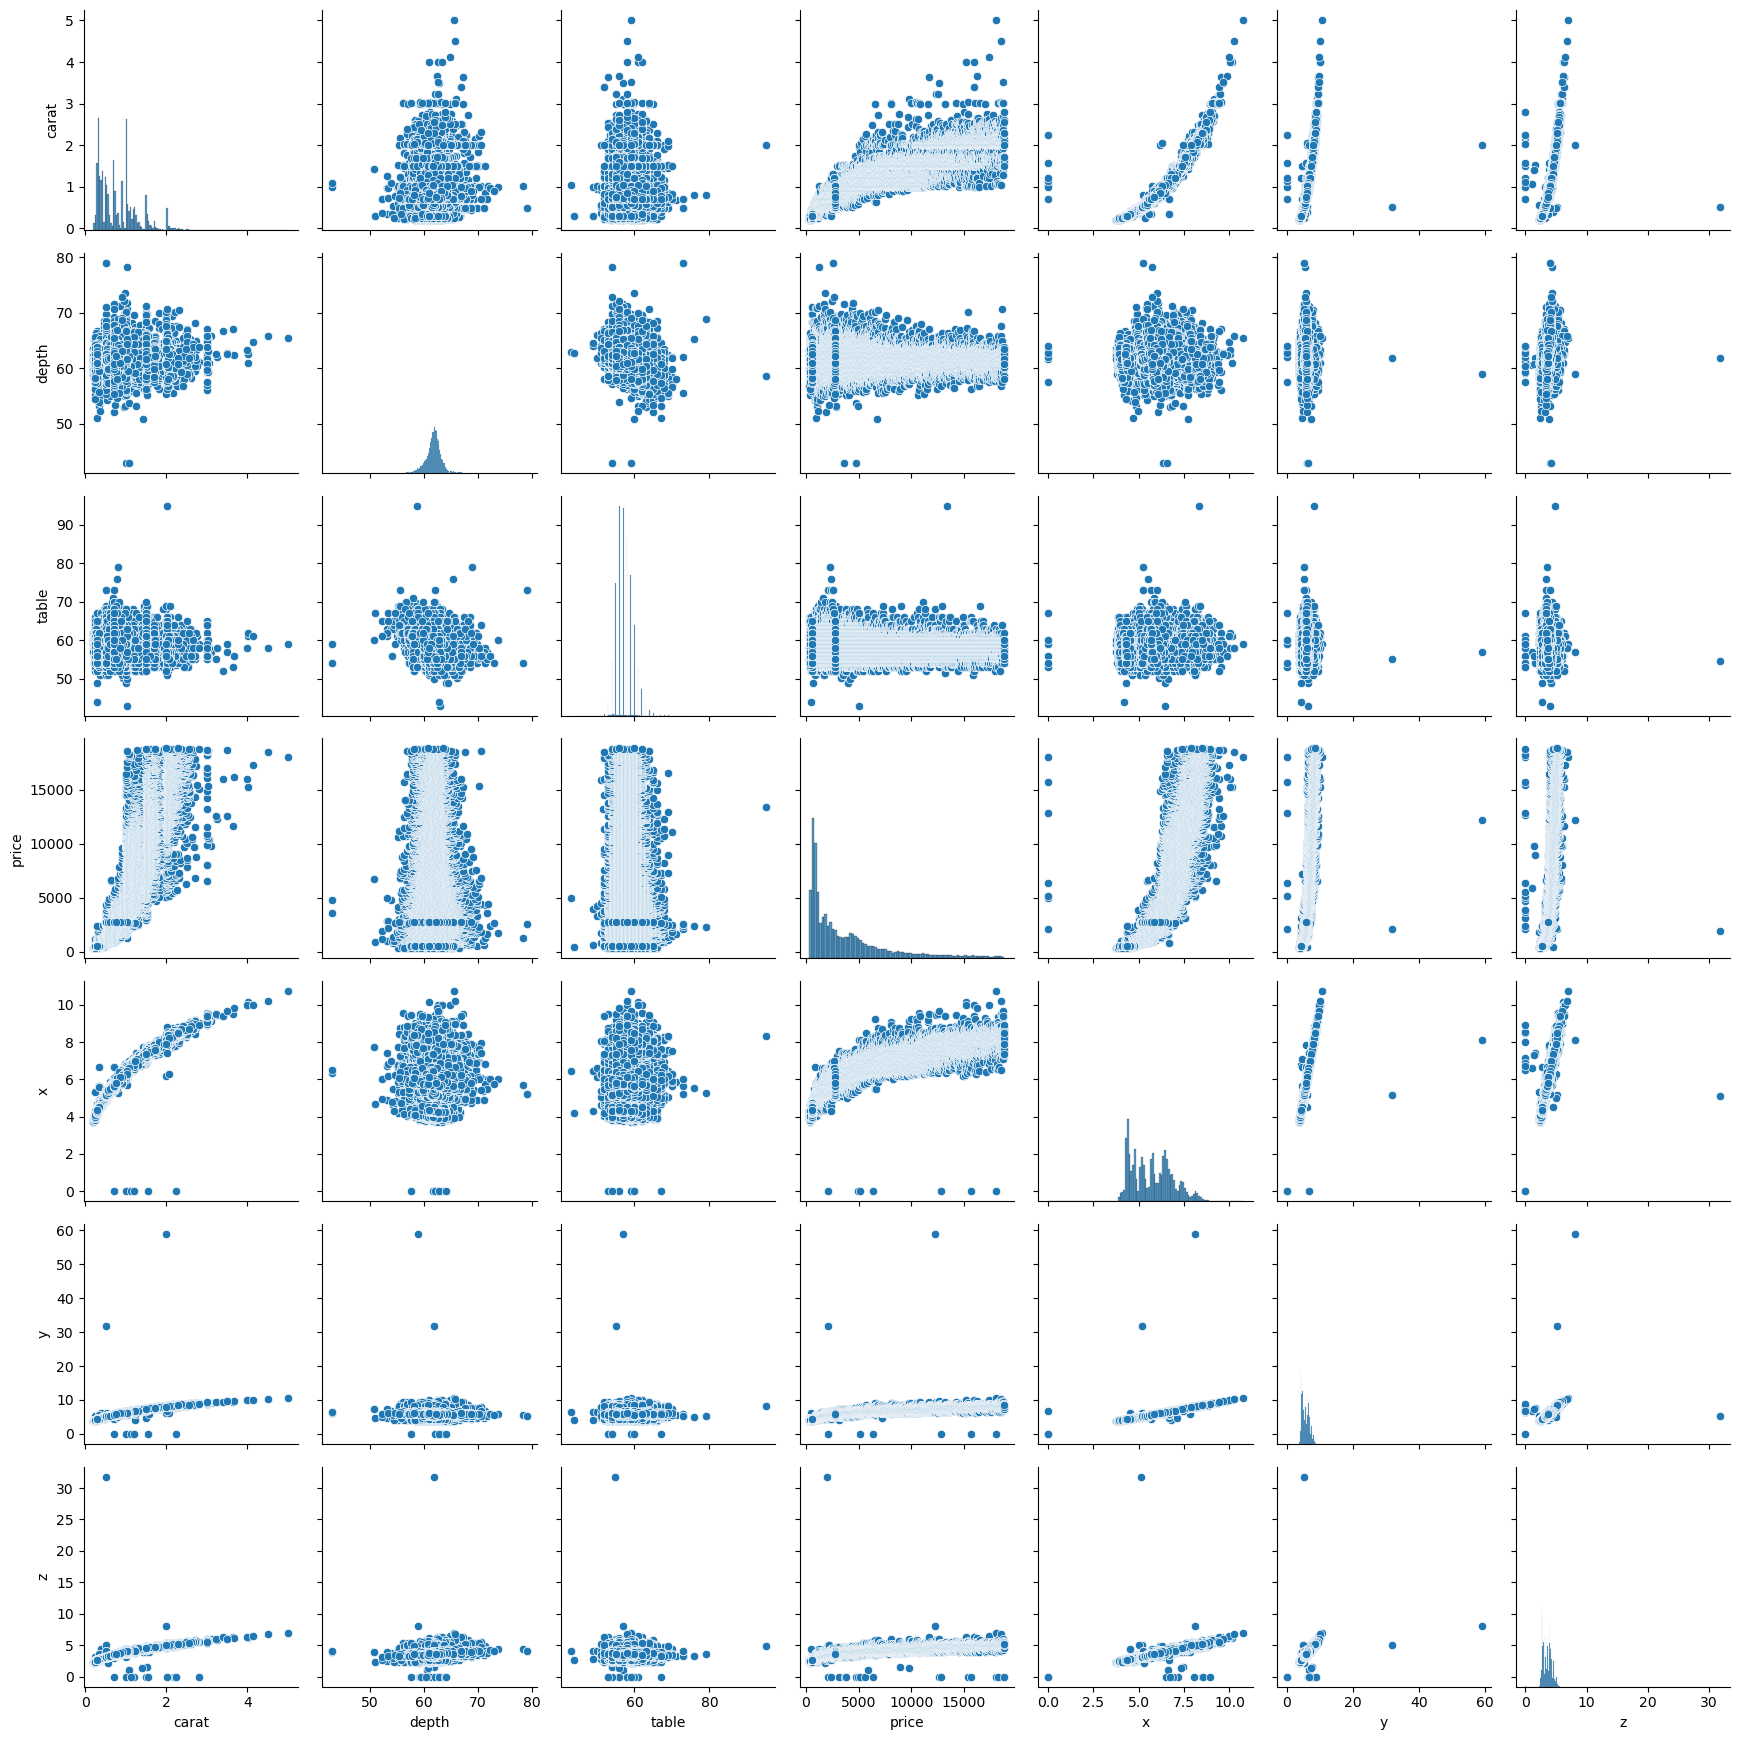

In [14]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

In [15]:
corr_matrix = df.corr()

/tmp/ipykernel_5200/3147368345.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [16]:
# Check the Correlation between price and other factors
corr_matrix['price'].sort_values(ascending = False)

price    1.000000
carat    0.921804
x        0.884919
y        0.864393
z        0.860963
table    0.129848
depth   -0.012731
Name: price, dtype: float64

<Axes: >

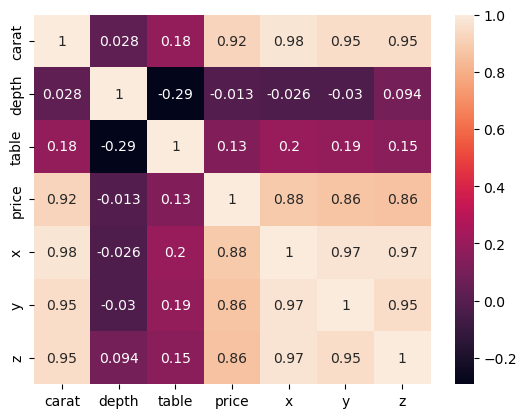

In [17]:
sns.heatmap(corr_matrix, annot = True)

# Split the data into training and testing sets :

In [18]:
X = df.drop(columns = 'price')

In [19]:
y = df['price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

# Data Preprocessing :

### Dealing with nulls

In [21]:
X_train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [22]:
X_test.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

### Encoding Categorical Variables

In [23]:
# explore unique categories in 'cut' column
X_train['cut'].unique()

array(['Good', 'Premium', 'Fair', 'Ideal', 'Very Good'], dtype=object)

In [24]:
X_test['cut'].unique()

array(['Good', 'Ideal', 'Very Good', 'Premium', 'Fair'], dtype=object)

In [25]:
# explore unique categories in 'color' column
X_train['color'].unique()

array(['G', 'D', 'E', 'H', 'J', 'F', 'I'], dtype=object)

In [26]:
X_test['color'].unique()

array(['G', 'H', 'I', 'E', 'F', 'D', 'J'], dtype=object)

In [27]:
# explore unique categories in 'clarity' column
X_train['clarity'].unique()

array(['SI1', 'I1', 'VVS2', 'SI2', 'VS2', 'VVS1', 'VS1', 'IF'],
      dtype=object)

In [28]:
X_test['clarity'].unique()

array(['I1', 'VS1', 'SI1', 'VS2', 'VVS1', 'SI2', 'VVS2', 'IF'],
      dtype=object)

In [29]:
# Use the pandas get_dummies() function for One-Hot Encoding
X_train_encoded = pd.get_dummies(X_train, columns=['cut', 'color', 'clarity'])

In [30]:
X_test_encoded = pd.get_dummies(X_test, columns=['cut', 'color', 'clarity'])

# Build the Model

## Select the Appropriate Model

In [31]:
# Initialize regression models
models = {
    'Linear_Regression' : LinearRegression(),
    'Lasso_Regression' : Lasso(),
    'Ridge_Regression' : Ridge(),
    'RANSAC' : RANSACRegressor(),
    'Decision_Tree_Regression' : DecisionTreeRegressor(),
    'Random_Forest_Regression' : RandomForestRegressor()
    
}

In [32]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse}, R^2: {r2}")

Linear_Regression - MSE: 1186751.082598386, R^2: 0.9232213916987426
Lasso_Regression - MSE: 1184420.825224525, R^2: 0.9233721511299092
Ridge_Regression - MSE: 1186813.80265126, R^2: 0.923217333932592
RANSAC - MSE: 18336014.67511875, R^2: -0.18627546179662824
Decision_Tree_Regression - MSE: 541557.752375, R^2: 0.9649631239846269
Random_Forest_Regression - MSE: 288086.6502218939, R^2: 0.9813618100724384


#### Random Forest is the Best Model in This Case

## Hyperparameter Tuning- GridSearchCV

In [33]:
# Create a Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)

In [34]:
param_grid = {
    'n_estimators' : [25, 50, 100, 150], # Number of Trees
    'max_features' : ['sqrt', 'log2', None], # Max Feateures in each Tree
    'max_depth' : [3, 6, 9], # Max Number of Nodes in Each Tree
    'max_leaf_nodes' : [3, 6, 9] # Maximum number of leaf nodes in the tree
}

In [35]:
grid_searsh = GridSearchCV(rf_model, param_grid)
grid_searsh.fit(X_train_encoded, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [36]:
# Get the best hyperparameters and model
best_params = grid_searsh.best_params_
best_model = grid_searsh.best_estimator_

In [37]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 150}


## Evaluate The Model in Test Set

In [38]:
y_pred_best = best_model.predict(X_test_encoded)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

In [39]:
print("Best Model - MSE:", mse_best)
print("Best Model - R^2:", r2_best)

Best Model - MSE: 1540101.4299015533
Best Model - R^2: 0.9003608708140238


## Feature Importance Analysis

In [40]:
# Get the Feature Importance
feature_importances = best_model.feature_importances_

In [41]:
# Extract Feature Names
features_names = df.columns

## Visualize the predicted values against the true target values

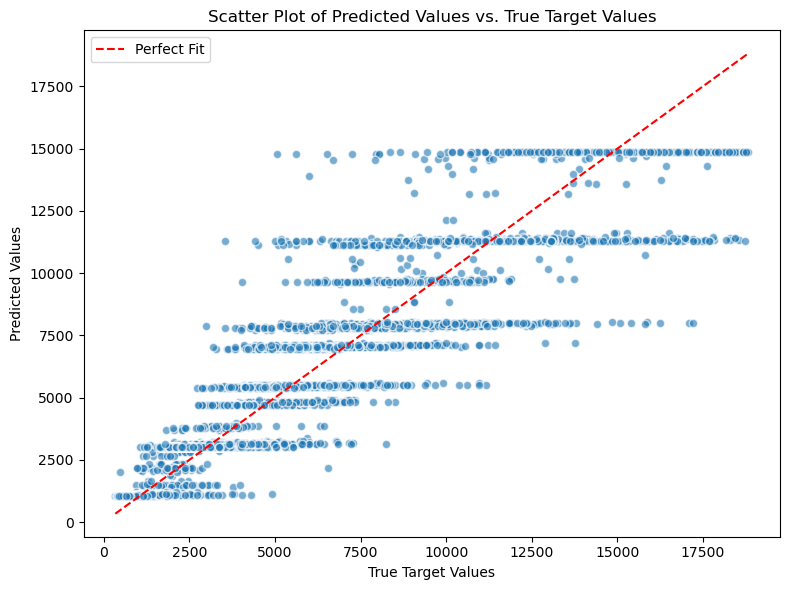

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, edgecolors='w')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Fit')
plt.xlabel('True Target Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted Values vs. True Target Values')
plt.legend()
plt.tight_layout()
plt.show()

## Residual Analysis

In [56]:
# Calculate the residuals (the differences between true target values and model's predictions)
residuals = y_test - y_pred_best

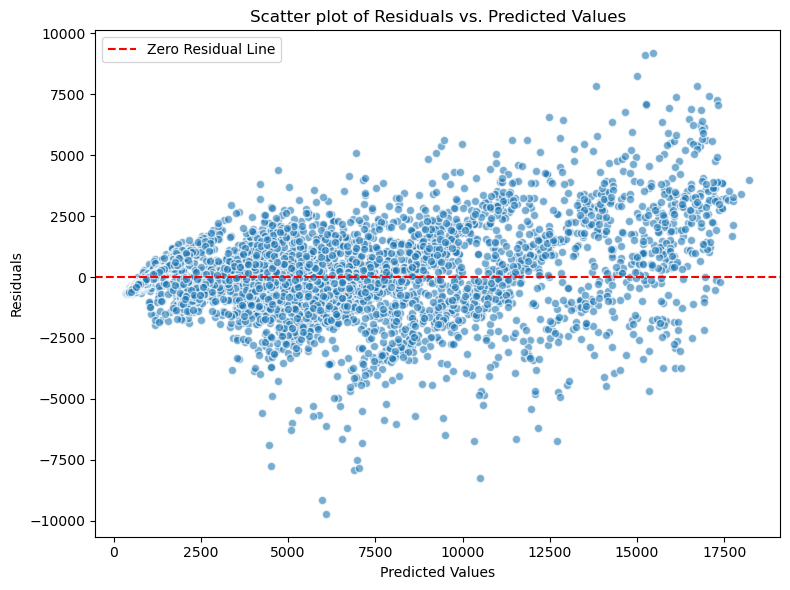

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='w')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Scatter plot of Residuals vs. Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()